# 1

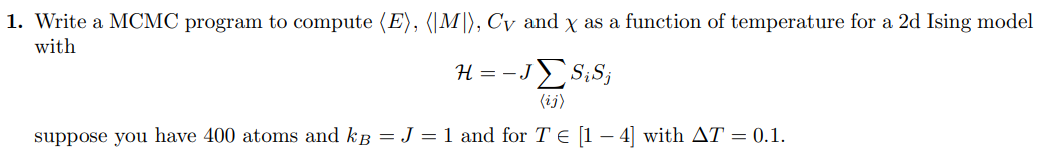

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ره حل جزوه دقیقا جواب نمیده! ولی از لینک زیر راه درست رو میشه دید.

https://rajeshrinet.github.io/blog/2014/ising-model/

Text(0.5, 1.0, 'Susceptibility')

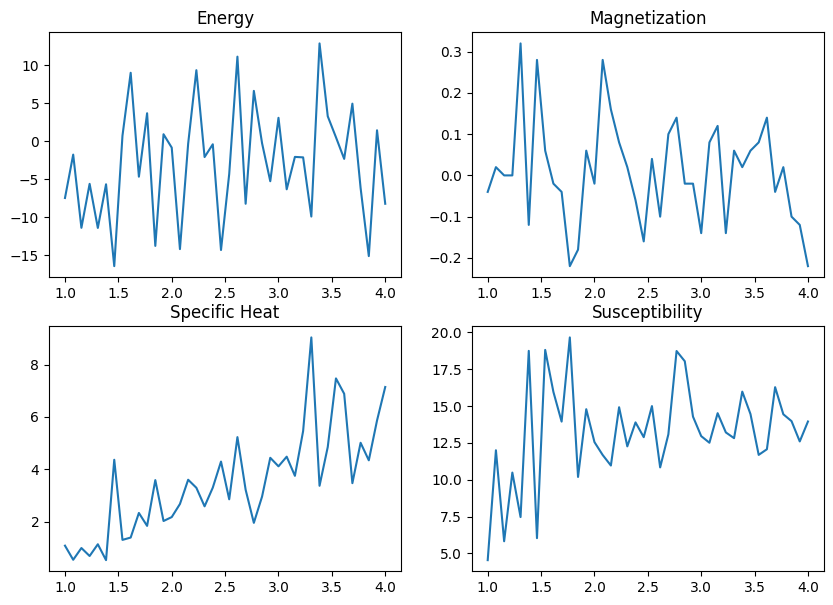

In [24]:

def p(x):
    return np.exp(-x)

def EnergyandM(S,N):
  H= 0
  for i in range(N):
    for j in range(N):
      nears= S[(i + 1) % N, j] + S[i, (j + 1) % N]+S[(i -1) % N, j]+S[i, (j -1) % N]
      H= H - S[i,j]* nears

  return H/4,np.sum(S) #اینو استاد نگفته بود ولی بنظرم دوبار داریم حساب میکنیم!

def change(S,N,T):
  for i in range(N):
    for j in range(N):

      nears= S[(i + 1) % N, j] + S[i, (j + 1) % N]+S[(i -1) % N, j]+S[i, (j -1) % N]
      dE=  2*S[i,j] * nears

    # acceptance_ratio = min(1, p(dE))
    if dE<0 or np.random.rand() < p(dE/T):
      S[i,j] = -S[i,j]

  return S

def make_S(N):
  S= np.random.choice([-1,1],(N,N))
  return S

Ts= np.linspace(1,4,40)
N= 10
S= make_S(N)

Ms=[]
Es=[]
Cs=[]
Xs=[]

mcSteps= 100

for T in Ts:
  E1,E2,M1,M2=0,0,0,0
  S= make_S(N)
  # for i in range(eqSteps):
  #   change(S,N,T)

  for i in range(mcSteps):
    change(S,N,T)
    H,M= EnergyandM(S,N)
    E1 = E1 + H
    M1 = M1 + M
    E2= E2+ H**2
    M2= M2+ M**2

  Ms.append(M/mcSteps)
  Es.append(E1/mcSteps)
  Cs.append(E2/mcSteps-E1**2/(mcSteps**2))
  Xs.append(M2/mcSteps-M1**2/(mcSteps**2))



fig,axs= plt.subplots(2,2,figsize=(10, 7))
axs= axs.flatten()

axs[0].plot(Ts,Es)
axs[0].set_title('Energy')

axs[1].plot(Ts,Ms)
axs[1].set_title('Magnetization')

axs[2].plot(Ts,Cs)
axs[2].set_title('Specific Heat')

axs[3].plot(Ts,Xs)
axs[3].set_title('Susceptibility')




# 2. For the above question, consider an external magnetic field as Bext = +1, now compute hEi, h|M|i, CV and χ as a function of temperature,

Text(0.5, 1.0, 'Susceptibility')

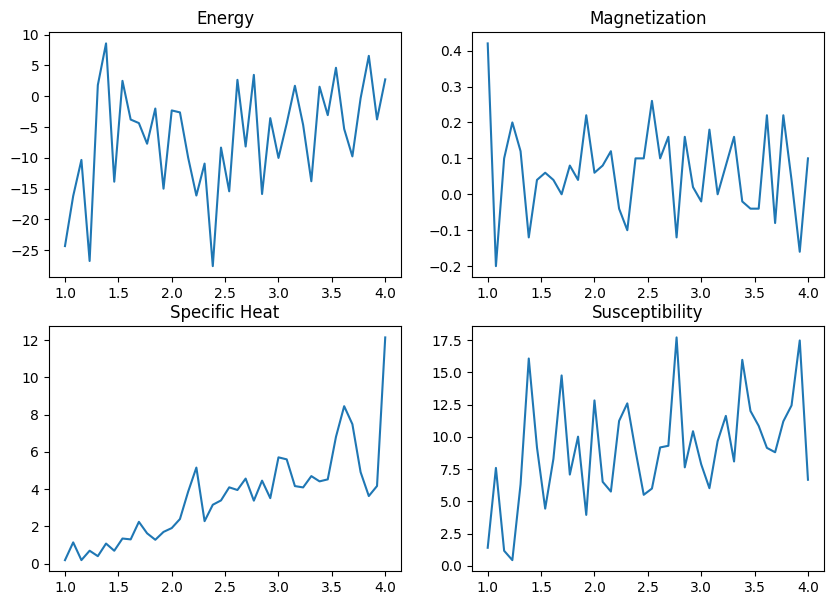

In [26]:

def p(x):
    return np.exp(-x)

def EnergyandM(S,N,B):
  H= 0
  for i in range(N):
    for j in range(N):
      nears= S[(i + 1) % N, j] + S[i, (j + 1) % N]+S[(i -1) % N, j]+S[i, (j -1) % N]
      H= H - S[i,j]* (nears + B)

  return H/4,np.sum(S) #اینو استاد نگفته بود ولی بنظرم دوبار داریم حساب میکنیم!

def change(S,N,T,B):
  for i in range(N):
    for j in range(N):

      nears= S[(i + 1) % N, j] + S[i, (j + 1) % N]+S[(i -1) % N, j]+S[i, (j -1) % N]
      dE=  2*S[i,j] * (nears+B)

    # acceptance_ratio = min(1, p(dE))
    if dE<0 or np.random.rand() < p(dE/T):
      S[i,j] = -S[i,j]

  return S

def make_S(N):
  S= np.random.choice([-1,1],(N,N))
  return S

Ts= np.linspace(1,4,40)
N= 10
B=1
S= make_S(N)

Ms=[]
Es=[]
Cs=[]
Xs=[]

mcSteps= 100

for T in Ts:
  E1,E2,M1,M2=0,0,0,0
  S= make_S(N)
  # for i in range(eqSteps):
  #   change(S,N,T)

  for i in range(mcSteps):
    change(S,N,T,B)
    H,M= EnergyandM(S,N,B)
    E1 = E1 + H
    M1 = M1 + M
    E2= E2+ H**2
    M2= M2+ M**2

  Ms.append(M/mcSteps)
  Es.append(E1/mcSteps)
  Cs.append(E2/mcSteps-E1**2/(mcSteps**2))
  Xs.append(M2/mcSteps-M1**2/(mcSteps**2))



fig,axs= plt.subplots(2,2,figsize=(10, 7))
axs= axs.flatten()

axs[0].plot(Ts,Es)
axs[0].set_title('Energy')

axs[1].plot(Ts,Ms)
axs[1].set_title('Magnetization')

axs[2].plot(Ts,Cs)
axs[2].set_title('Specific Heat')

axs[3].plot(Ts,Xs)
axs[3].set_title('Susceptibility')


